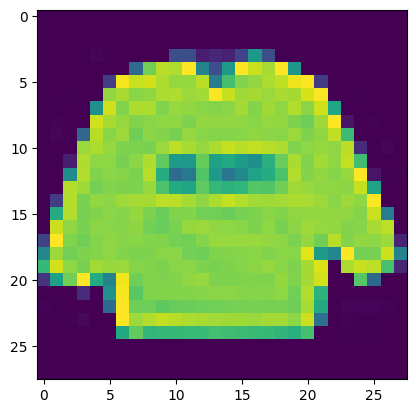

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - accuracy: 0.8121 - loss: 0.5416 - val_accuracy: 0.8677 - val_loss: 0.3831
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.8743 - loss: 0.3557 - val_accuracy: 0.8785 - val_loss: 0.3488
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.8880 - loss: 0.3144 - val_accuracy: 0.8940 - val_loss: 0.3113
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.8981 - loss: 0.2890 - val_accuracy: 0.8896 - val_loss: 0.3077
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9031 - loss: 0.2720 - val_accuracy: 0.8982 - val_loss: 0.2893
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9100 - loss: 0.2511 - val_accuracy: 0.9050 - val_loss: 0.2714
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.9153 - loss: 0.2351 - val_accuracy: 0.9027 - val_loss: 0.2724
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9187 - loss: 0.2242 - 

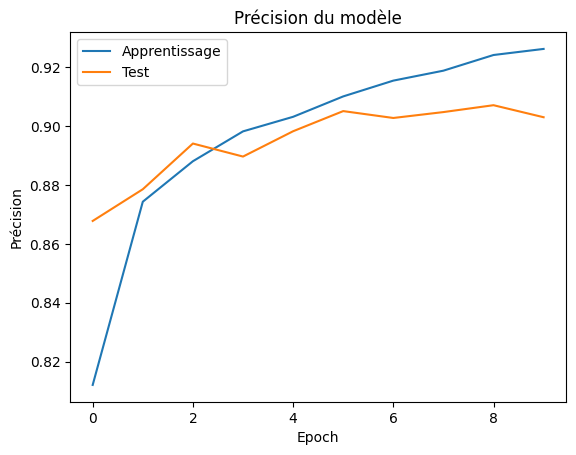

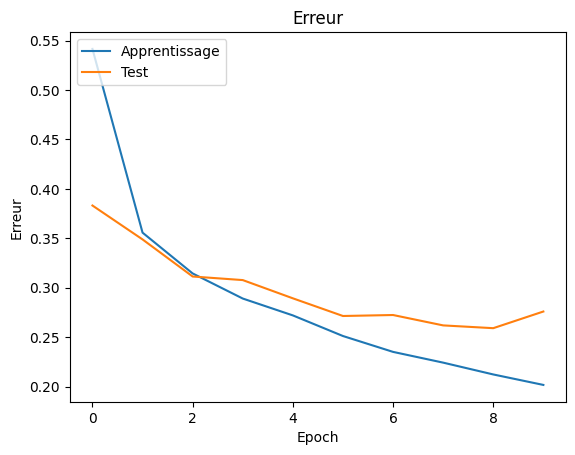

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 42s 215ms/step - accuracy: 0.8277 - loss: 0.4665 - val_accuracy: 0.8536 - val_loss: 0.4059
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8789 - loss: 0.3665

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8789 - loss: 0.3665 - val_accuracy: 0.8508 - val_loss: 0.4073
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.8486 - loss: 0.4113 - val_accuracy: 0.8494 - val_loss: 0.4020
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8281 - loss: 0.4998 - val_accuracy: 0.8556 - val_loss: 0.3919
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 38s 200ms/step - accuracy: 0.8547 - loss: 0.3874 - val_accuracy: 0.8608 - val_loss: 0.3824
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.8516 - loss: 0.4038 - val_accuracy: 0.8606 - val_loss: 0.3801
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 38s 199ms/step - accuracy: 0.8600 - loss: 0.3780 - val_accuracy: 0.8623 - val_loss: 0.3711
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.8906 - loss: 0.3087 - val_accuracy: 0.8661 - val_loss: 0.3681
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 40s 214ms/step - accuracy: 0.8648 - loss: 0.3644 - val_accurac

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization


tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

#Sauvegarde du modèle
# Serialisation du modèle 

model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))
reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

historique_apprentissage = reseauNeurones4Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

